In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical

In [13]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

print("Training set shape: ",x_train.shape)
print("Test set shape: ",x_test.shape)
print("Unique lables: ",np.unique(y_train))

Training set shape:  (60000, 28, 28)
Test set shape:  (10000, 28, 28)
Unique lables:  [0 1 2 3 4 5 6 7 8 9]


In [14]:
x_train,x_test = x_train / 255.0, x_test / 255.0


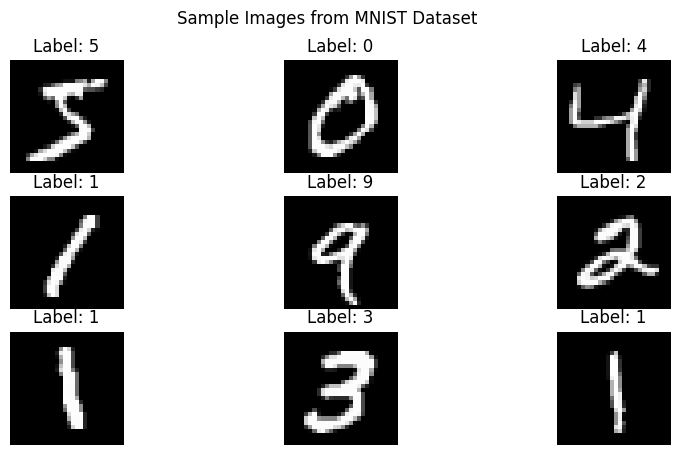

In [15]:
plt.figure(figsize=(10,5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.suptitle("Sample Images from MNIST Dataset")
plt.show()

In [16]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),      # Flatten 28x28 images
    layers.Dense(128, activation='relu'),      # Hidden layer 1
    layers.Dense(64, activation='relu'),       # Hidden layer 2
    layers.Dense(10, activation='softmax')     # Output layer (10 classes)
])

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [18]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=1)


Epoch 1/5
1688/1688 [==============================] - 5s 2ms/step - loss: 0.2613 - accuracy: 0.9226 - val_loss: 0.1099 - val_accuracy: 0.9658
Epoch 2/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1071 - accuracy: 0.9669 - val_loss: 0.0952 - val_accuracy: 0.9708
Epoch 3/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0762 - accuracy: 0.9760 - val_loss: 0.0929 - val_accuracy: 0.9735
Epoch 4/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0569 - accuracy: 0.9820 - val_loss: 0.0848 - val_accuracy: 0.9750
Epoch 5/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0444 - accuracy: 0.9858 - val_loss: 0.0950 - val_accuracy: 0.9763


In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")


✅ Test Accuracy: 97.33%


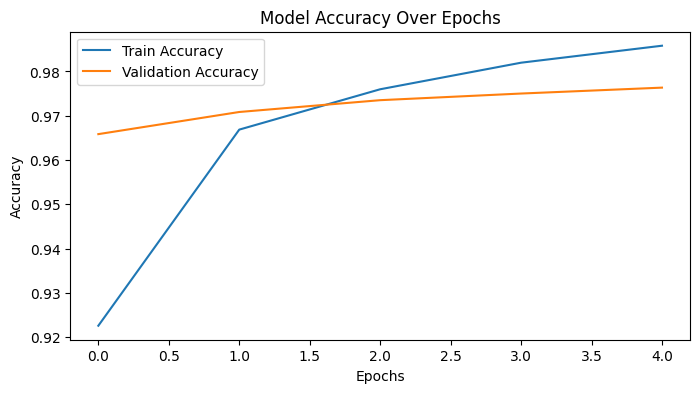

In [20]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [21]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 962us/step


In [24]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_classes)


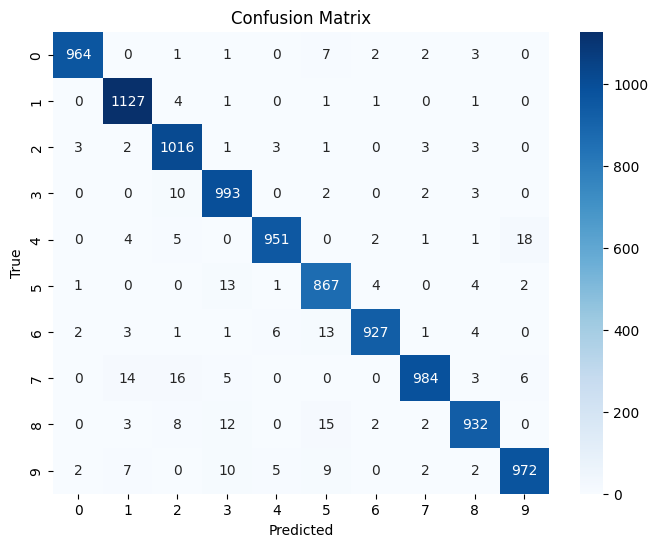

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

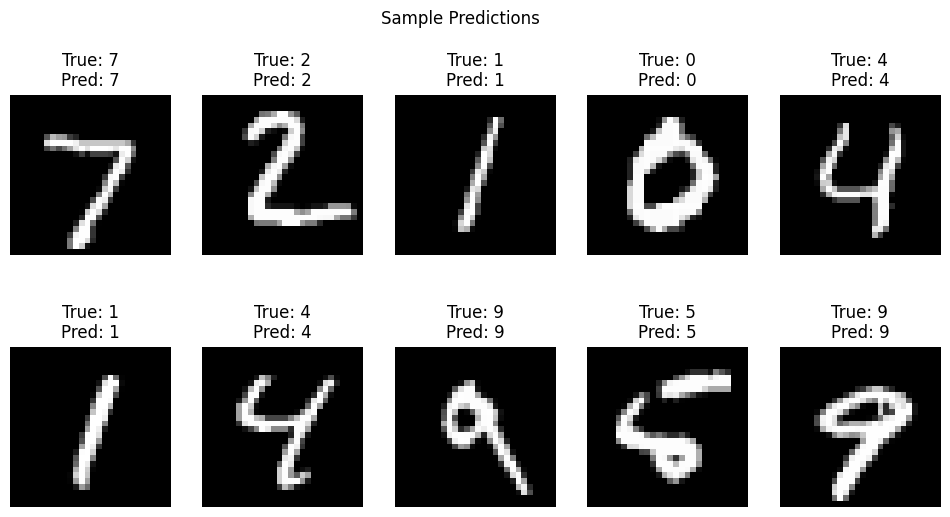

In [26]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred_classes[i]}")
    plt.axis('off')
plt.suptitle("Sample Predictions")
plt.show()

In [27]:
accuracy = np.mean(y_pred_classes == y_test)
misclassified = np.sum(y_pred_classes != y_test)
print(f"Overall Test Accuracy: {accuracy * 100:.2f}%")
print(f"Total Misclassified Samples: {misclassified} / {len(y_test)}")

Overall Test Accuracy: 97.33%
Total Misclassified Samples: 267 / 10000


In [28]:
model.save('mnist_model.h5')
print("\n Model saved as mnist_model.h5")


 Model saved as mnist_model.h5


c:\Users\dell\Portfolio\.venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
